# NLP - Sentiment Analysis and Classification Project

---

## Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 

Also each row corresponds to a customer review, and includes the variables:

**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.

---

## 1. Exploratory Data Analysis

### Importing Libraries, Loading and Discovering the Data

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rstsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rstsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rstsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Wrangling

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
df.shape

(23486, 10)

In [4]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


#### Proportion of Target Class Variable

In [7]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

C:\Users\rstsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


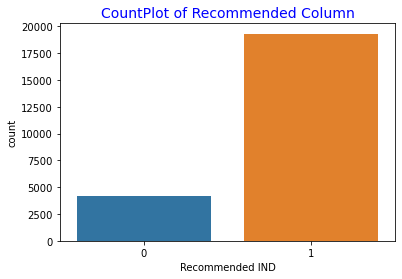

In [8]:
sns.countplot(df["Recommended IND"])
plt.title("CountPlot of Recommended Column", c="blue", size=14);

---
---


## 2. Feature Selection and Data Cleaning

### Feature Selection, Rename Column Name and Missing Value Detection

In [9]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
print("Number of Null 'Review Text' rows:", len(df[df["Review Text"].isnull()]))

Number of Null 'Review Text' rows: 845


There is no possible way to fill missing "Review Text" rows. On the other hand, some columns are not necessary for sentiment analysis. So that, missing values and unnecessary columns will be dropped.

In [11]:
df.drop(['Clothing ID', 'Age', 'Title', 'Rating',
       'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1, inplace=True)
df.dropna(inplace=True)

In [12]:
df.rename({"Review Text":"reviews", "Recommended IND":"recommended"}, axis=1, inplace=True)

In [13]:
df.head()

,reviews,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [14]:
df.shape

(22641, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**.

### Tokenization, Noise Removal and Lexicon Normalization

In [15]:
stop_words = stopwords.words("english")
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [16]:
def text_mining(x):
    
    """This function does tokenizaton, noise removal and lexicon normalization in sequence."""
    
    """Word Tokenize"""
    process_1 = word_tokenize(x.lower())
    """Removing Non-alphabetic tokens"""
    process_2 = [w for w in process_1 if w.isalpha()]
    """Removing Stopwords"""
    process_3 = [y for y in process_2 if y not in stop_words]
    "Using lemmatize function on tokens"
    process_4 = [lem.lemmatize(z) for z in process_3]
    
    return " ".join(process_4)

In [17]:
df["reviews"] = df["reviews"].apply(text_mining)

In [18]:
df.head()

,reviews,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


---


## 4. WordCloud - Repetition of Words

### Detecting Reviews (positive and negative separately)

In [19]:
positive = df[df["recommended"] == 1]["reviews"]
negative = df[df["recommended"] == 0]["reviews"]

In [20]:
positive.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
6    aded basket hte last mintue see would look lik...
Name: reviews, dtype: object

In [21]:
negative.head()

2     high hope dress really wanted work initially o...
5     love tracy reese dress one petite foot tall us...
10    dress run small esp zipper area run ordered sp...
22    first pullover styling side zipper would purch...
25    loved material didnt really look long dress pu...
Name: reviews, dtype: object

### Collecting Words (positive and negative separately)

In [22]:
positivelist = " ".join(positive)
negativelist = " ".join(negative)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

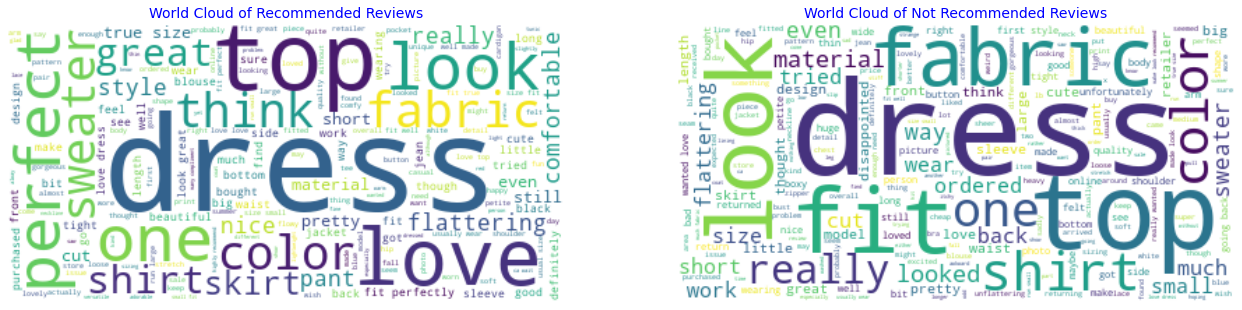

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22,14))
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(positivelist)


ax[0].set_title("World Cloud of Recommended Reviews",c="blue", size=14)
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].axis("off")

wordcloud2 = WordCloud(background_color="white", max_words=1000)
wordcloud2.generate(negativelist)


ax[1].set_title("World Cloud of Not Recommended Reviews", c="blue", size=14)
ax[1].imshow(wordcloud2, interpolation="bilinear")
ax[1].axis("off");

## 5. Sentiment Classification with Machine Learning

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df["reviews"], df["recommended"], test_size=0.3, random_state=42)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [25]:
countvector = CountVectorizer()
countvector.fit(X_train)
X_train_countvec = countvector.transform(X_train)
X_test_countvec = countvector.transform(X_test)

### TF-IDF

In [26]:
tfidfvector = TfidfVectorizer()
tfidfvector.fit(X_train)
X_train_tfidfvec = tfidfvector.transform(X_train)
X_test_tfidfvec = tfidfvector.transform(X_test)

### Logistic Regression

In [27]:
# Scoring variable will be used in cross validation for getting both accuracy score and f1 score.
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score)}

In [28]:
log_model = LogisticRegression()
log_model.fit(X_train_countvec, y_train)
y_pred_log_model = log_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_log_model))
print("\n")
print(classification_report(y_test, y_pred_log_model))

[[ 735  512]
 [ 271 5275]]


              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1247
           1       0.91      0.95      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.82      0.77      0.79      6793
weighted avg       0.88      0.88      0.88      6793



C:\Users\rstsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
log_model2 = LogisticRegression()
log_model2.fit(X_train_tfidfvec, y_train)
y_pred_log_model2 = log_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_log_model2))
print("\n")
print(classification_report(y_test, y_pred_log_model2))

[[ 630  617]
 [ 172 5374]]


              precision    recall  f1-score   support

           0       0.79      0.51      0.61      1247
           1       0.90      0.97      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.84      0.74      0.77      6793
weighted avg       0.88      0.88      0.87      6793



In [30]:
params_log = {"penalty":["l1", "l2", "elasticnet"],
              "C":[0.5,1,1.5],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

In [37]:
log_model_countvec_rand = RandomizedSearchCV(LogisticRegression(), param_distributions=params_log, n_jobs=-1, cv=3).fit(X_train_countvec, y_train)
print(log_model_countvec_rand.best_params_)

{'solver': 'saga', 'penalty': 'l1', 'C': 1}


C:\Users\rstsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [38]:
log_model_tfidfvec_rand = RandomizedSearchCV(LogisticRegression(), param_distributions=params_log, n_jobs=-1, cv=3).fit(X_train_tfidfvec, y_train)
print(log_model_tfidfvec_rand.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 1.5}


In [39]:
log_model = LogisticRegression(solver="saga", penalty="l2", C=1)
log_model.fit(X_train_countvec, y_train)
y_pred_log_model = log_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_log_model))
print("\n")
print(classification_report(y_test, y_pred_log_model))

[[ 745  502]
 [ 263 5283]]


              precision    recall  f1-score   support

           0       0.74      0.60      0.66      1247
           1       0.91      0.95      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.83      0.78      0.80      6793
weighted avg       0.88      0.89      0.88      6793



C:\Users\rstsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [41]:
log_model2 = LogisticRegression(solver="liblinear", penalty="l1", C=1.5)
log_model2.fit(X_train_tfidfvec, y_train)
y_pred_log_model2 = log_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_log_model2))
print("\n")
print(classification_report(y_test, y_pred_log_model2))

[[ 717  530]
 [ 219 5327]]


              precision    recall  f1-score   support

           0       0.77      0.57      0.66      1247
           1       0.91      0.96      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.84      0.77      0.80      6793
weighted avg       0.88      0.89      0.88      6793



In [46]:
log_countvec_score = cross_validate(LogisticRegression(solver="sag", penalty="l2", C=1), X_train_countvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
log_countvec_cv_accuracy = log_countvec_score["test_accuracy"].mean()
log_countvec_cv_f1_score = log_countvec_score["test_f1_score"].mean()
print("Accuracy score for Logistic Regression with CountVectorized: ", log_countvec_cv_accuracy)
print("F1 score for Logistic Regression with CountVectorized:", log_countvec_cv_f1_score)

Accuracy score for Logistic Regression with CountVectorized:  0.8809312812508399
F1 score for Logistic Regression with CountVectorized: 0.9285813426703996


In [47]:
log_tfidfvec_score = cross_validate(LogisticRegression(solver="liblinear", penalty="l1", C=1.5), X_train_tfidfvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
log_tfidfvec_cv_accuracy = log_tfidfvec_score["test_accuracy"].mean()
log_tfidfvec_cv_f1_score = log_tfidfvec_score["test_f1_score"].mean()
print("Accuracy score for Logistic Regression with Tf-Idf: ", log_tfidfvec_cv_accuracy)
print("F1 score for Logistic Regression with Tf-Idf:", log_tfidfvec_cv_f1_score)

Accuracy score for Logistic Regression with Tf-Idf:  0.8869257485518723
F1 score for Logistic Regression with Tf-Idf: 0.9329651052891176


### Support Vector Machine (SVM)

In [48]:
svc_model = SVC()
svc_model.fit(X_train_countvec, y_train)
y_pred_svc_model = svc_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_svc_model))
print("\n")
print(classification_report(y_test, y_pred_svc_model))

[[ 628  619]
 [ 160 5386]]


              precision    recall  f1-score   support

           0       0.80      0.50      0.62      1247
           1       0.90      0.97      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.85      0.74      0.77      6793
weighted avg       0.88      0.89      0.87      6793



In [49]:
svc_model2 = SVC()
svc_model2.fit(X_train_tfidfvec, y_train)
y_pred_svc_model2 = svc_model.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_svc_model2))
print("\n")
print(classification_report(y_test, y_pred_svc_model2))

[[  78 1169]
 [   8 5538]]


              precision    recall  f1-score   support

           0       0.91      0.06      0.12      1247
           1       0.83      1.00      0.90      5546

    accuracy                           0.83      6793
   macro avg       0.87      0.53      0.51      6793
weighted avg       0.84      0.83      0.76      6793



In [50]:
params_svc = {"C": [0.1, 1, 2],
              "kernel":["linear", "poly", "rbf", "sigmoid"],
              "gamma":[0.1, 1, 10]}

In [51]:
svc_model_countvec_rand = RandomizedSearchCV(SVC(), param_distributions=params_svc, cv=3).fit(X_train_countvec, y_train)
print(svc_model_countvec_rand.best_params_)

{'kernel': 'linear', 'gamma': 1, 'C': 0.1}


In [52]:
svc_model_tfidfvec_rand = RandomizedSearchCV(SVC(), param_distributions=params_svc, cv=3).fit(X_train_tfidfvec, y_train)
print(svc_model_tfidfvec_rand.best_params_)

{'kernel': 'rbf', 'gamma': 1, 'C': 2}


In [53]:
svc_model = SVC(kernel="linear", gamma=1, C=0.1)
svc_model.fit(X_train_countvec, y_train)
y_pred_svc_model = svc_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_svc_model))
print("\n")
print(classification_report(y_test, y_pred_svc_model))

[[ 705  542]
 [ 245 5301]]


              precision    recall  f1-score   support

           0       0.74      0.57      0.64      1247
           1       0.91      0.96      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.82      0.76      0.79      6793
weighted avg       0.88      0.88      0.88      6793



In [54]:
svc_model2 = SVC(kernel="rbf", gamma=1, C=2)
svc_model2.fit(X_train_tfidfvec, y_train)
y_pred_svc_model2 = svc_model.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_svc_model2))
print("\n")
print(classification_report(y_test, y_pred_svc_model2))

[[  51 1196]
 [   3 5543]]


              precision    recall  f1-score   support

           0       0.94      0.04      0.08      1247
           1       0.82      1.00      0.90      5546

    accuracy                           0.82      6793
   macro avg       0.88      0.52      0.49      6793
weighted avg       0.84      0.82      0.75      6793



In [55]:
svc_countvec_score = cross_validate(SVC(kernel="linear", gamma=1, C=0.1), X_train_countvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
svc_countvec_cv_accuracy = svc_countvec_score["test_accuracy"].mean()
svc_countvec_cv_f1_score = svc_countvec_score["test_f1_score"].mean()
print("Accuracy score for Support Vector Machine with CountVectorized: ", svc_countvec_cv_accuracy)
print("F1 score for Support Vector Machine with CountVectorized:", svc_countvec_cv_f1_score)

Accuracy score for Support Vector Machine with CountVectorized:  0.8844014322503192
F1 score for Support Vector Machine with CountVectorized: 0.9309945406115055


In [64]:
svc_tfidfvec_score = cross_validate(SVC(), X_train_tfidfvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
svc_tfidfvec_cv_accuracy = svc_tfidfvec_score["test_accuracy"].mean()
svc_tfidfvec_cv_f1_score = svc_tfidfvec_score["test_f1_score"].mean()
print("Accuracy score for Support Vector Machine with Tf-Idf: ", svc_tfidfvec_cv_accuracy)
print("F1 score for Support Vector Machine with Tf-Idf:", svc_tfidfvec_cv_f1_score)

Accuracy score for Support Vector Machine with Tf-Idf:  0.8827610138835107
F1 score for Support Vector Machine with Tf-Idf: 0.9314141421945985


### Random Forest

In [57]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_countvec, y_train)
y_pred_rfc_model = rfc_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_rfc_model))
print("\n")
print(classification_report(y_test, y_pred_rfc_model))

[[ 279  968]
 [  39 5507]]


              precision    recall  f1-score   support

           0       0.88      0.22      0.36      1247
           1       0.85      0.99      0.92      5546

    accuracy                           0.85      6793
   macro avg       0.86      0.61      0.64      6793
weighted avg       0.86      0.85      0.81      6793



In [58]:
rfc_model2 = RandomForestClassifier()
rfc_model2.fit(X_train_tfidfvec, y_train)
y_pred_rfc_model2 = rfc_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_rfc_model2))
print("\n")
print(classification_report(y_test, y_pred_rfc_model2))

[[ 281  966]
 [  43 5503]]


              precision    recall  f1-score   support

           0       0.87      0.23      0.36      1247
           1       0.85      0.99      0.92      5546

    accuracy                           0.85      6793
   macro avg       0.86      0.61      0.64      6793
weighted avg       0.85      0.85      0.81      6793



In [59]:
params_rfc = {"n_estimators":[50, 100, 300],
              "criterion":["gini", "entropy"],
              "min_samples_split":[2,3,4], 
              "max_features":["auto", "sqrt", "log2"]}

In [60]:
rfc_model_countvec_rand = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params_rfc, n_jobs=-1, cv=3).fit(X_train_countvec, y_train)
print(rfc_model_countvec_rand.best_params_)

{'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'sqrt', 'criterion': 'gini'}


In [61]:
rfc_model_tfidfvec_rand = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params_rfc, n_jobs=-1, cv=3).fit(X_train_tfidfvec, y_train)
print(rfc_model_tfidfvec_rand.best_params_)

{'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'criterion': 'gini'}


In [62]:
rfc_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, max_features="sqrt", criterion="gini")
rfc_model.fit(X_train_countvec, y_train)
y_pred_rfc_model = rfc_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_rfc_model))
print("\n")
print(classification_report(y_test, y_pred_rfc_model))

[[ 279  968]
 [  38 5508]]


              precision    recall  f1-score   support

           0       0.88      0.22      0.36      1247
           1       0.85      0.99      0.92      5546

    accuracy                           0.85      6793
   macro avg       0.87      0.61      0.64      6793
weighted avg       0.86      0.85      0.81      6793



In [63]:
rfc_model2 = RandomForestClassifier(n_estimators=50, min_samples_split=2, max_features="sqrt", criterion="gini")
rfc_model2.fit(X_train_tfidfvec, y_train)
y_pred_rfc_model2 = rfc_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_rfc_model2))
print("\n")
print(classification_report(y_test, y_pred_rfc_model2))

[[ 267  980]
 [  47 5499]]


              precision    recall  f1-score   support

           0       0.85      0.21      0.34      1247
           1       0.85      0.99      0.91      5546

    accuracy                           0.85      6793
   macro avg       0.85      0.60      0.63      6793
weighted avg       0.85      0.85      0.81      6793



In [65]:
rfc_countvec_score = cross_validate(RandomForestClassifier(), X_train_countvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
rfc_countvec_cv_accuracy = rfc_countvec_score["test_accuracy"].mean()
rfc_countvec_cv_f1_score = rfc_countvec_score["test_f1_score"].mean()
print("Accuracy score for Random Forest Classifier with CountVectorized: ", rfc_countvec_cv_accuracy)
print("F1 score for Random Forest Classifier with CountVectorized:", rfc_countvec_cv_f1_score)

Accuracy score for Random Forest Classifier with CountVectorized:  0.8538615909446102
F1 score for Random Forest Classifier with CountVectorized: 0.9175864027414642


In [66]:
rfc_tfidfvec_score = cross_validate(RandomForestClassifier(), X_train_tfidfvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
rfc_tfidfvec_cv_accuracy = rfc_tfidfvec_score["test_accuracy"].mean()
rfc_tfidfvec_cv_f1_score = rfc_tfidfvec_score["test_f1_score"].mean()
print("Accuracy score for Random Forest Classifier with Tf-Idf: ", rfc_tfidfvec_cv_accuracy)
print("F1 score for Random Forest Classifier with Tf-Idf:", rfc_tfidfvec_cv_f1_score)

Accuracy score for Random Forest Classifier with Tf-Idf:  0.8496339041562934
F1 score for Random Forest Classifier with Tf-Idf: 0.9155417777604757


### Ada  Boosting

In [67]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_countvec, y_train)
y_pred_adaboost_model = adaboost_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_adaboost_model))
print("\n")
print(classification_report(y_test, y_pred_adaboost_model))

[[ 571  676]
 [ 254 5292]]


              precision    recall  f1-score   support

           0       0.69      0.46      0.55      1247
           1       0.89      0.95      0.92      5546

    accuracy                           0.86      6793
   macro avg       0.79      0.71      0.74      6793
weighted avg       0.85      0.86      0.85      6793



In [68]:
adaboost_model2 = AdaBoostClassifier()
adaboost_model2.fit(X_train_tfidfvec, y_train)
y_pred_adaboost_model2 = adaboost_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_adaboost_model2))
print("\n")
print(classification_report(y_test, y_pred_adaboost_model2))

[[ 554  693]
 [ 266 5280]]


              precision    recall  f1-score   support

           0       0.68      0.44      0.54      1247
           1       0.88      0.95      0.92      5546

    accuracy                           0.86      6793
   macro avg       0.78      0.70      0.73      6793
weighted avg       0.85      0.86      0.85      6793



In [69]:
params_adaboost = {"n_estimators":[20, 50,100, 200, 500],
                   "learning_rate":[0.1, 0.5, 1, 2]}

In [70]:
adaboost_model_countvec_rand = RandomizedSearchCV(AdaBoostClassifier(), param_distributions=params_adaboost, n_jobs=-1, cv=3).fit(X_train_countvec, y_train)
print(adaboost_model_countvec_rand.best_params_)

{'n_estimators': 500, 'learning_rate': 0.5}


In [71]:
adaboost_model_tfidfvec_rand = RandomizedSearchCV(AdaBoostClassifier(), param_distributions=params_adaboost, n_jobs=-1, cv=3).fit(X_train_tfidfvec, y_train)
print(adaboost_model_tfidfvec_rand.best_params_)

{'n_estimators': 200, 'learning_rate': 0.5}


In [72]:
adaboost_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.5)
adaboost_model.fit(X_train_countvec, y_train)
y_pred_adaboost_model = adaboost_model.predict(X_test_countvec)
print(confusion_matrix(y_test, y_pred_adaboost_model))
print("\n")
print(classification_report(y_test, y_pred_adaboost_model))

[[ 657  590]
 [ 218 5328]]


              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1247
           1       0.90      0.96      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.83      0.74      0.77      6793
weighted avg       0.87      0.88      0.87      6793



In [73]:
adaboost_model2 = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)
adaboost_model2.fit(X_train_tfidfvec, y_train)
y_pred_adaboost_model2 = adaboost_model2.predict(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_adaboost_model2))
print("\n")
print(classification_report(y_test, y_pred_adaboost_model2))

[[ 551  696]
 [ 171 5375]]


              precision    recall  f1-score   support

           0       0.76      0.44      0.56      1247
           1       0.89      0.97      0.93      5546

    accuracy                           0.87      6793
   macro avg       0.82      0.71      0.74      6793
weighted avg       0.86      0.87      0.86      6793



In [74]:
adaboost_countvec_score = cross_validate(AdaBoostClassifier(n_estimators=500, learning_rate=0.5), X_train_countvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
adaboost_countvec_cv_accuracy = adaboost_countvec_score["test_accuracy"].mean()
adaboost_countvec_cv_f1_score = adaboost_countvec_score["test_f1_score"].mean()
print("Accuracy score for Ada Boosting with CountVectorized: ", adaboost_countvec_cv_accuracy)
print("F1 score for Ada Boosting with CountVectorized:", adaboost_countvec_cv_f1_score)

Accuracy score for Ada Boosting with CountVectorized:  0.878849142869657
F1 score for Ada Boosting with CountVectorized: 0.9287062261273358


In [75]:
adaboost_tfidfvec_score = cross_validate(AdaBoostClassifier(n_estimators=200, learning_rate=0.5), X_train_tfidfvec, y_train, cv=5, n_jobs=-1, scoring=scoring)
adaboost_tfidfvec_cv_accuracy = adaboost_tfidfvec_score["test_accuracy"].mean()
adaboost_tfidfvec_cv_f1_score = adaboost_tfidfvec_score["test_f1_score"].mean()
print("Accuracy score for Ada Boosting with Tf-Idf: ", adaboost_tfidfvec_cv_accuracy)
print("F1 score for Ada Boosting with Tf-Idf:", adaboost_tfidfvec_cv_f1_score)

Accuracy score for Ada Boosting with Tf-Idf:  0.8722239399227334
F1 score for Ada Boosting with Tf-Idf: 0.9254212704605831


### Naive Bayes

In [76]:
multinb_model = MultinomialNB()
multinb_model.fit(X_train_countvec.toarray(), y_train)
y_pred_multinb_model = multinb_model.predict(X_test_countvec.toarray())
print(confusion_matrix(y_test, y_pred_multinb_model))
print("\n")
print(classification_report(y_test, y_pred_multinb_model))

[[ 810  437]
 [ 313 5233]]


              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1247
           1       0.92      0.94      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.82      0.80      0.81      6793
weighted avg       0.89      0.89      0.89      6793



In [77]:
multinb_model2 = MultinomialNB()
multinb_model2.fit(X_train_tfidfvec.toarray(), y_train)
y_pred_multinb_model2 = multinb_model2.predict(X_test_tfidfvec.toarray())
print(confusion_matrix(y_test, y_pred_multinb_model2))
print("\n")
print(classification_report(y_test, y_pred_multinb_model2))

[[  45 1202]
 [   1 5545]]


              precision    recall  f1-score   support

           0       0.98      0.04      0.07      1247
           1       0.82      1.00      0.90      5546

    accuracy                           0.82      6793
   macro avg       0.90      0.52      0.49      6793
weighted avg       0.85      0.82      0.75      6793



In [78]:
multinb_countvec_score = cross_validate(MultinomialNB(), X_train_countvec.toarray(), y_train, cv=5, n_jobs=-1, scoring=scoring)
multinb_countvec_cv_accuracy = multinb_countvec_score["test_accuracy"].mean()
multinb_countvec_cv_f1_score = multinb_countvec_score["test_f1_score"].mean()
print("Accuracy score for Multinomial Naive Bayes with CountVectorized: ", multinb_countvec_cv_accuracy)
print("F1 score for Multinomial Naive Bayes with CountVectorized:", multinb_countvec_cv_f1_score)

Accuracy score for Multinomial Naive Bayes with CountVectorized:  0.8869887603986968
F1 score for Multinomial Naive Bayes with CountVectorized: 0.9314678326684585


In [79]:
multinb_tfidfvec_score = cross_validate(MultinomialNB(), X_train_tfidfvec.toarray(), y_train, cv=5, n_jobs=-1, scoring=scoring)
multinb_tfidfvec_cv_accuracy = multinb_tfidfvec_score["test_accuracy"].mean()
multinb_tfidfvec_cv_f1_score = multinb_tfidfvec_score["test_f1_score"].mean()
print("Accuracy score for Multinomial Naive Bayes with Tf-Idf: ", multinb_tfidfvec_cv_accuracy)
print("F1 score for Multinomial Naive Bayes with Tf-Idf:", multinb_tfidfvec_cv_f1_score)

Accuracy score for Multinomial Naive Bayes with Tf-Idf:  0.825593122650121
F1 score for Multinomial Naive Bayes with Tf-Idf: 0.9038346086416613


### Compare Models Accuracies and F1 Scores

In [80]:
final_df_accuracy = pd.DataFrame({"model_and_method":["Logistic Regression - Countvectorized", "Logistic Regression - Tf-Idf", "SVM - Countvectorized",
                                            "SVM - Tf-Idf", "Random Forest - Counvectorized", "Random Forest Tf-Idf", "Ada Boosting - Countvectorized",
                                            "Ada Boosting - Tf-Idf", "Multinomial Naive Bayes - Countvectorized", "Multinomial Naive Bayes - Tf-Idf"],
                         "accuracy":[log_countvec_cv_accuracy, log_tfidfvec_cv_accuracy, svc_countvec_cv_accuracy, svc_tfidfvec_cv_accuracy, rfc_countvec_cv_accuracy,
                                     rfc_tfidfvec_cv_accuracy, adaboost_countvec_cv_accuracy, adaboost_tfidfvec_cv_accuracy, multinb_countvec_cv_accuracy, multinb_tfidfvec_cv_accuracy]})
                         

final_df_f1_score = pd.DataFrame({"model_and_method":["Logistic Regression - Countvectorized", "Logistic Regression - Tf-Idf", "SVM - Countvectorized",
                                            "SVM - Tf-Idf", "Random Forest - Counvectorized", "Random Forest Tf-Idf", "Ada Boosting - Countvectorized",
                                            "Ada Boosting - Tf-Idf", "Multinomial Naive Bayes - Countvectorized", "Multinomial Naive Bayes - Tf-Idf"],
                         "f1-score":[log_countvec_cv_f1_score, log_tfidfvec_cv_f1_score, svc_countvec_cv_f1_score, svc_tfidfvec_cv_f1_score, rfc_countvec_cv_f1_score,
                                     rfc_tfidfvec_cv_f1_score, adaboost_countvec_cv_f1_score, adaboost_tfidfvec_cv_f1_score, multinb_countvec_cv_f1_score, multinb_tfidfvec_cv_f1_score]})

In [81]:
final_df_accuracy = final_df_accuracy.sort_values(by="accuracy", ascending=True)
final_df_f1_score = final_df_f1_score.sort_values(by="f1-score", ascending=True)

#### Accuracy Score

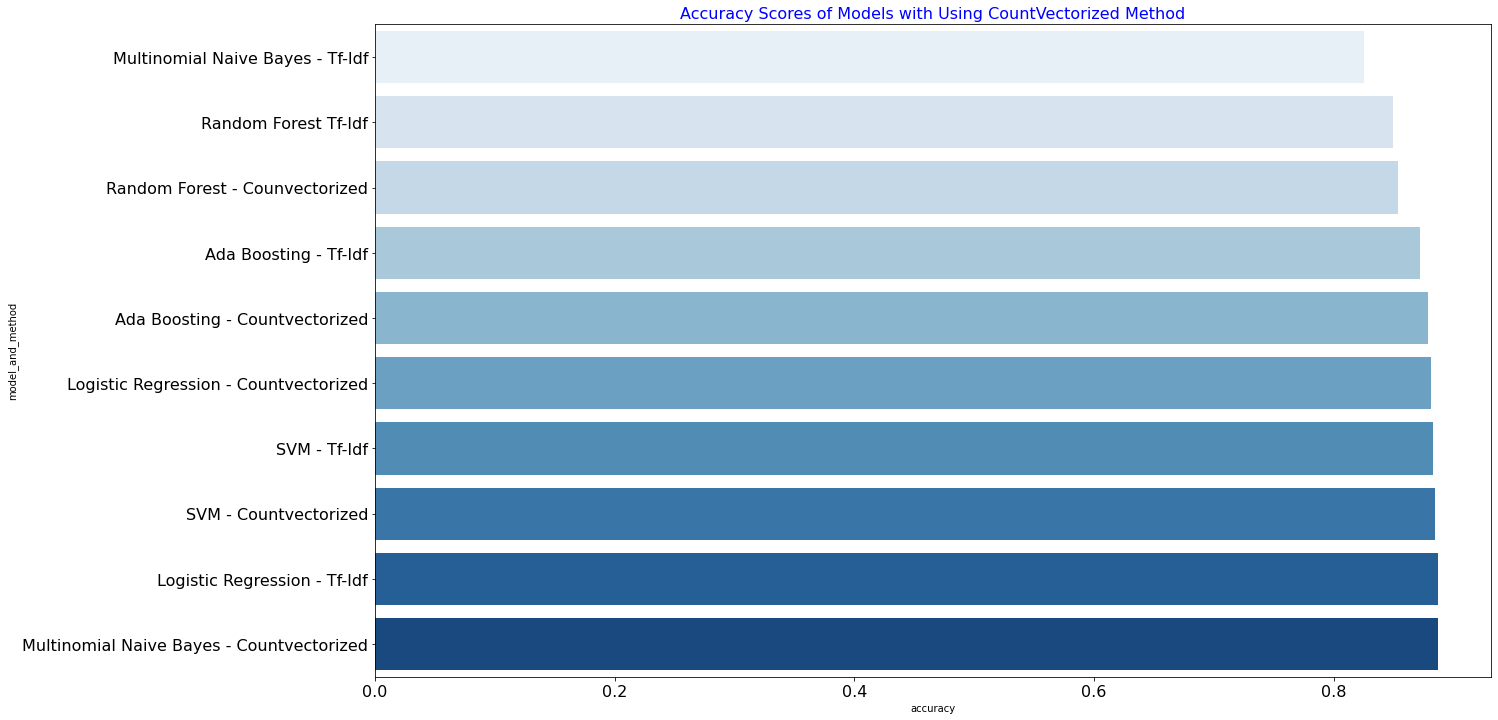

In [82]:
plt.figure(figsize=(20,12))

sns.barplot(x="accuracy", y="model_and_method", data=final_df_accuracy, palette="Blues")

plt.title("Accuracy Scores of Models with Using CountVectorized Method", c="blue", size=16)
plt.yticks(size=16)
plt.xticks(size=16);

#### F1 Score

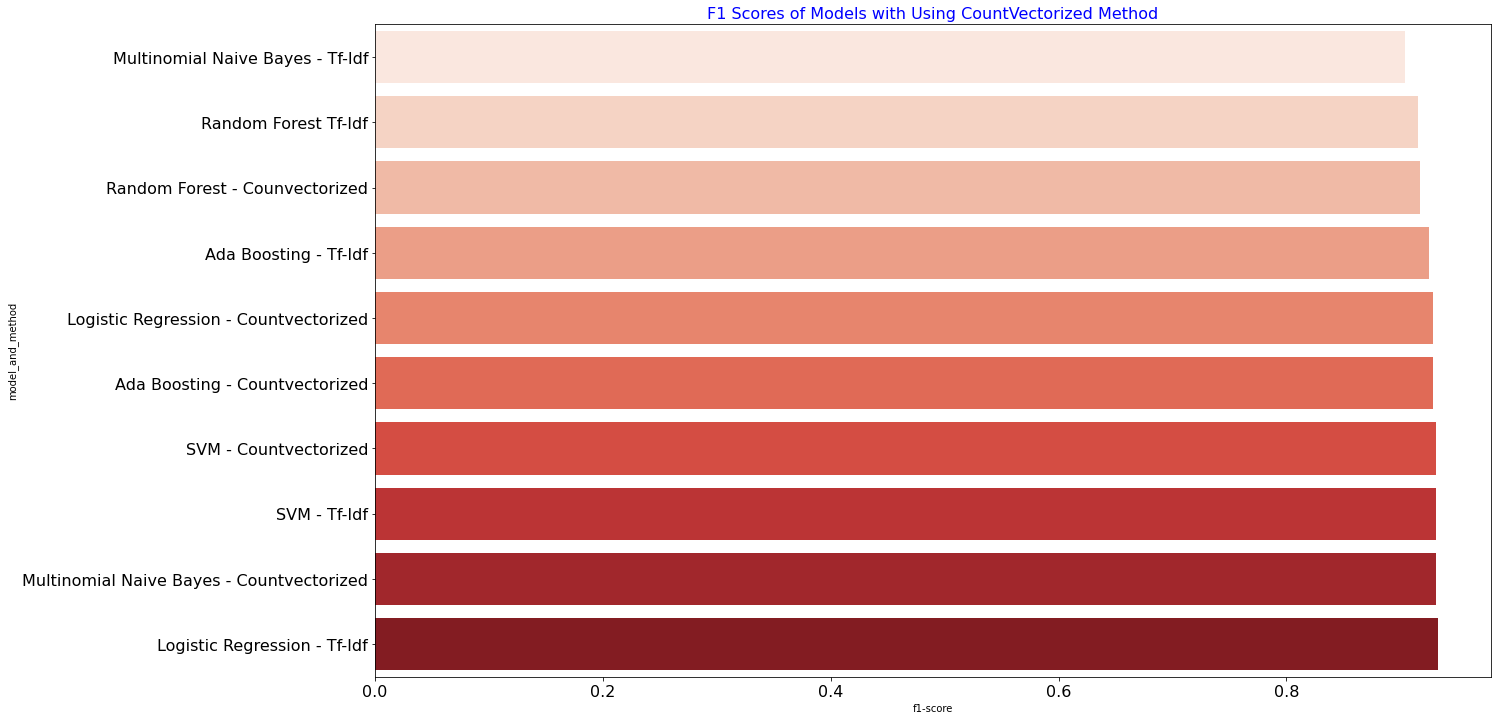

In [83]:
plt.figure(figsize=(20,12))

sns.barplot(x="f1-score", y="model_and_method", data=final_df_f1_score, palette="Reds")

plt.title("F1 Scores of Models with Using CountVectorized Method", c="blue", size=16)
plt.yticks(size=16)
plt.xticks(size=16);

#### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Multinomial Naive Bayes with using CountVectorized method and we got best f1 score of 0.93 for Logistic Regression with using Tf-Idf method. 